Exploratory analysis

In [699]:
# Reading in the merged data
nyc_zm = pd.read_pickle('../nyc_zm.pkl')
sf_zm = pd.read_pickle('../sf_zm.pkl')
chicago_zm = pd.read_pickle('../chicago_zm.pkl')

# And DC, which I'm predicting:
dc = pd.read_pickle('../dc.pkl') 
dc_prop = pd.read_pickle('../dc_prop.pkl') 

EDA

In [804]:
#merging nyc and sf to look at
print sf_zm.shape
print nyc_zm.shape
training = sf_zm.append(nyc_zm)
print training.shape

(2029, 15)
(2771, 15)
(4800, 15)


In [805]:
#dropping 10 obs where I only have Michelin data
training = training[np.isfinite(training['food'])]
print training.shape

(4790, 15)


In [31]:
# Missing cost for over 25% of my dataset
training.cost.isnull().sum()

1385

In [35]:
# Looks like these may be restaurants without Zagat ratings - they do at least have price level
training[training.cost.isnull()==True].sample(7)

,addr_city,cost,cuisine,latitude,longitude,neighborhood,open_table,price_level,title,url,food,decor,service,address,stars
4565,Berkeley,None,None,37.8795967,-122.2975159,None,,I,doughnut dolly,https://www.zagat.com/r/doughnut-dolly-berkeley,0.0,0.0,0.0,NaN,NaN
2523,New York,None,French,40.7191391,-74.0002518,SoHo,http://www.opentable.com/restaurant/profile/21...,VE,le coucou,https://www.zagat.com/r/le-coucou-new-york,0.0,0.0,0.0,NaN,NaN
4110,San Francisco,None,None,37.7998466,-122.4412460,Marina District,,M,reed greenough,https://www.zagat.com/r/reed-greenough-san-fra...,0.0,0.0,0.0,NaN,NaN
2422,New York,None,Chinese,40.7409706,-73.9934006,Flatiron,http://www.opentable.com/restaurant/profile/19...,E,jue lan club,https://www.zagat.com/r/jue-lan-club-new-york,0.0,0.0,0.0,NaN,NaN
4243,Danville,None,Californian,37.8206902,-121.9979019,None,,M,farmer's almanac,https://www.zagat.com/r/almanac-restaurant-dan...,0.0,0.0,0.0,NaN,NaN
4398,San Francisco,NaN,Japanese,37.7878761,-122.4334412,Lower Pacific Heights,,I,glaze teriyaki,https://www.zagat.com/r/glaze-teriyaki-grill-s...,0.0,0.0,0.0,NaN,NaN
2223,Brooklyn,None,American,40.6906509,-73.9950180,Brooklyn Heights,http://www.opentable.com/restaurant/profile/26...,E,beasts bottles,https://www.zagat.com/r/beasts-bottles-brooklyn,0.0,0.0,0.0,NaN,NaN


In [33]:
training.cuisine.value_counts(dropna=False)

NaN                   824
Italian               473
American              386
French                200
Mexican               199
Pizza                 181
Japanese              178
Chinese               142
New American          141
Seafood               137
Coffee Shop           126
Burger                102
Steakhouse             99
Cafe                   94
Ice Cream Shop         79
Indian                 78
Californian            76
Mediterranean          72
Thai                   70
Asian                  66
Sandwich Shop          64
Korean                 46
Sushi                  46
Spanish                45
Greek                  39
Vietnamese             38
Gastropub              38
Barbecue               37
Middle Eastern         33
Ramen                  32
                     ... 
Argentinean             2
Sri Lankan              2
English                 2
Swedish                 2
Jamaican                2
Eastern European        2
South Asia              2
South Americ

In [36]:
# Looking at a random sample of the restaurants with no cuisine...most, no Zagat ratings (still on Zagat, just no ratings)
training[training.cuisine.isnull()==True].sample(10)

,addr_city,cost,cuisine,latitude,longitude,neighborhood,open_table,price_level,title,url,food,decor,service,address,stars
2252,New York,None,None,40.7647171,-73.9915619,West 50s,,M,as is nyc,https://www.zagat.com/r/as-is-nyc-new-york,0.0,0.0,0.0,NaN,NaN
2659,Staten Island,None,None,40.6005249,-74.0922623,Grasmere,,M,pastosa ravioli,https://www.zagat.com/r/pastosa-ravioli-new-york2,0.0,0.0,0.0,NaN,NaN
1395,Staten Island,53,None,40.5876961,-74.1969452,Travis-Chelsea,,E,da noi on victory boulevard,https://www.zagat.com/r/da-noi-new-york,4.2,3.8,4.1,NaN,NaN
4737,Sunnyvale,None,None,37.3746414,-122.0571060,None,,I,starbird chicken,https://www.zagat.com/r/starbird-chicken-sunny...,0.0,0.0,0.0,NaN,NaN
4116,Berkeley,None,None,37.8707657,-122.2929688,None,,I,albatross pub,https://www.zagat.com/r/the-albatross-pub-berk...,0.0,0.0,0.0,NaN,NaN
637,Corona,19,None,40.7462769,-73.8599777,Corona,,M,leo's latticini,https://www.zagat.com/r/leos-latticini-new-york,4.4,3.2,4.0,NaN,NaN
2672,New York,None,None,40.8239975,-73.9493484,Hamilton Heights,,M,hogshead tavern,https://www.zagat.com/r/hogshead-tavern-new-york,0.0,0.0,0.0,NaN,NaN
4239,San Francisco,None,None,37.7381554,-122.3806534,Bayview-Hunters Point,,I,speakeasy ales lagers,https://www.zagat.com/r/speakeasy-ales-lagers-...,0.0,0.0,0.0,NaN,NaN
4489,San Francisco,None,None,37.7894516,-122.3998108,SoMa,,I,dabba,https://www.zagat.com/r/dabba-san-francisco,0.0,0.0,0.0,NaN,NaN
4669,San Francisco,None,None,37.7649040,-122.4243011,The Mission,,M,elixir,https://www.zagat.com/r/elixir-san-francisco,0.0,0.0,0.0,NaN,NaN


In [115]:
# Looking at star ratings by cuisine (although really, I'd want to compare to overall distribution of these cuisines)
training.groupby(training.stars, as_index=True).cuisine.value_counts(dropna = False)

stars  cuisine     
1.0    NaN             14
       American        14
       New American    12
       French          10
       Japanese         9
       Italian          5
       Sushi            5
       Thai             4
       Indian           3
       Spanish          3
       British          2
       Californian      2
       European         2
       Mexican          2
       Steakhouse       2
       Austrian         1
       Chinese          1
       Eclectic         1
       Moroccan         1
       New Zealand      1
       Portuguese       1
       Seafood          1
2.0    New American     4
       French           3
       NaN              2
       Italian          2
       Japanese         2
       American         1
       Californian      1
       Korean           1
       Scandinavian     1
3.0    NaN              3
       French           3
       New American     2
       American         1
       Japanese         1
       Seafood          1
Name: cuisine, dty

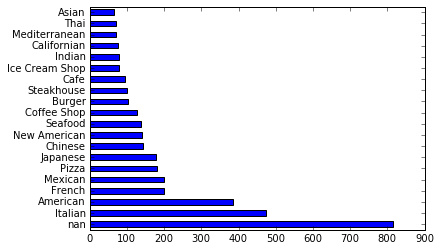

In [808]:
#plotting the 20 most frequent cuisines
training.cuisine.value_counts(dropna=False)[0:20].plot(kind='barh')

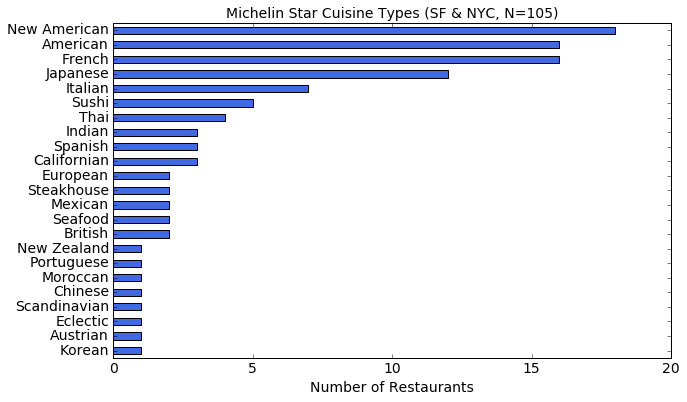

In [890]:
#comparing the charts, new american looks over-represented, as do French and Japanese - Italian is underrepresented 
fig, ax1 = plt.subplots(figsize=(10,8))
training[training.stars>0].cuisine.value_counts().plot(kind='barh', fontsize=14, color='royalblue')

ax1.set_title('Michelin Star Cuisine Types (SF & NYC, N=105)', fontsize=14)
ax1.set_xlabel('Number of Restaurants', fontsize=14)
ax1.invert_yaxis()
ax1.set_xlim([0,20])
plt.savefig('../cuisine.png')

In [37]:
# open_table isn't reading in as null when it is missing
training.open_table.isnull().sum()

10

In [40]:
# So actually, majority of restaurants don't have an open_table link
training[training.open_table == ''].open_table.count()

3153

In [43]:
# Nothing immediately jumps out about them
training[training.open_table == ''].sample(5)

,addr_city,cost,cuisine,latitude,longitude,neighborhood,open_table,price_level,title,url,food,decor,service,address,stars
4782,Santa Cruz,None,American,36.9608040,-122.0210266,None,,M,splash,https://www.zagat.com/r/splash-santa-cruz,0.0,0.0,0.0,NaN,NaN
180,Staten Island,6,Ice Cream Shop,40.5238762,-74.2149582,Prince's Bay,,I,ralph's famous italian ices,https://www.zagat.com/r/ralphs-famous-italian-...,4.5,3.0,4.0,NaN,NaN
3163,Mountain View,37,Indian,37.3850784,-122.0820618,None,,M,amber cafe,https://www.zagat.com/r/amber-cafe-mountain-view,4.4,4.2,4.1,NaN,NaN
188,New York,34,Vegan,40.7451019,-73.9975586,Chelsea,,I,blossom du jour,https://www.zagat.com/r/blossom-du-jour-new-york4,4.5,3.8,4.1,NaN,NaN
557,New York,35,Italian,40.7328491,-74.0084305,West Village,,M,malatesta trattoria,https://www.zagat.com/r/malatesta-trattoria-ne...,4.4,3.6,4.1,NaN,NaN


In [98]:
# It could be that very expensive or very inexpensive restaurants aren't on open table, let's see:
training.groupby(training.open_table =="", as_index=True).price_level.value_counts(normalize=True)

open_table  price_level
False       E              0.459841
            M              0.432250
            VE             0.090742
            I              0.017167
True        M              0.478597
            I              0.402961
            E              0.097522
            VE             0.020921
Name: price_level, dtype: float64

In [860]:
# But actually, a disproportionate number of star restaurants are on open table (open_table =='' is false)
training.groupby(training.open_table =="", as_index=True).stars.value_counts(dropna = False)

open_table  stars
False       NaN      1556
            1.0        63
            2.0        10
            3.0         8
True        NaN      3120
            1.0        24
            2.0         7
            3.0         2
Name: stars, dtype: int64

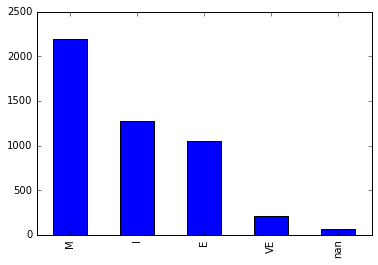

In [198]:
# Most restaurants are at the Medium price, with some inexpensive, some expensive, and a few VE 
training.price_level.value_counts(dropna=False).plot(kind='bar')

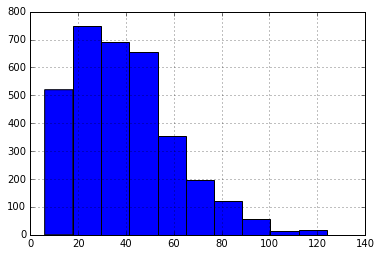

In [143]:
# as we would predict from the categories, price is skewed right (graph cut off at 125 for visibility)
training[training.cost <125].cost.hist()

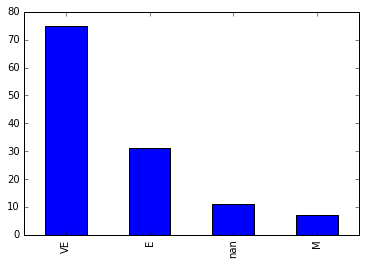

In [144]:
# Filtering for stars > 0... these are mostly VE (and none is Inexpensive)
training[training.stars>0].price_level.value_counts(dropna=False).plot(kind = 'bar')

In [872]:
import matplotlib.patches as mpatches

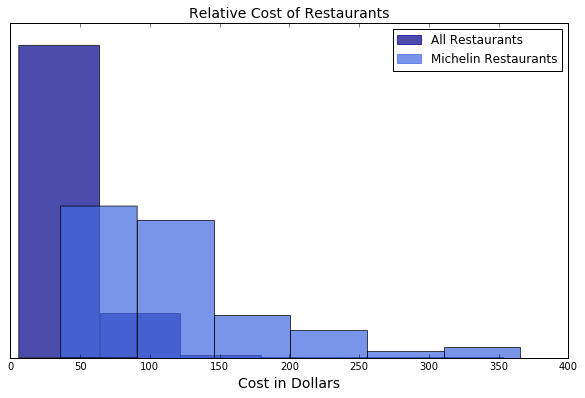

In [889]:
# Histogram for cost of star restaurants
fig, ax = plt.subplots(figsize=(10,6))
#fig = plt.figure()
#ax = fig.add_subplot(111)
Zagat = training.cost.hist(normed=True, alpha=.7, color='darkblue')
Michelin = training[training.stars>0].cost.hist(normed=True, alpha=.7, color='royalblue')
ax.set_title('Relative Cost of Restaurants', fontsize=14)
ax.set_ylabel('', fontsize=14)
ax.set_xlabel('Cost in Dollars', fontsize=14)
ax.grid(False)
ax.set_xlim([0,400])

allr = mpatches.Patch(color='darkblue', alpha=.7, label='All Restaurants')
mich = mpatches.Patch(color='royalblue', alpha=.7, label='Michelin Restaurants')
plt.legend(handles=[allr, mich])

cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_ticks([])



plt.savefig('../cost.png')




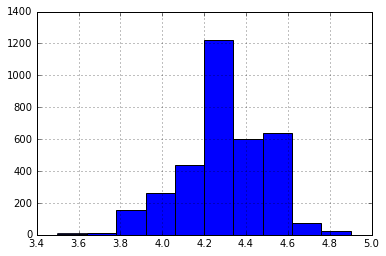

In [158]:
training[training.food>0].food.hist()

C:\Users\elynchklarup\AppData\Local\Continuum\Anaconda2_take2\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


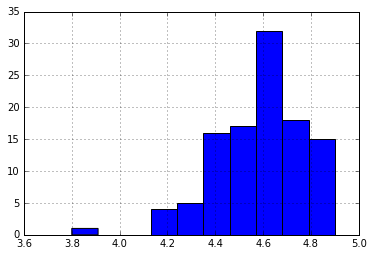

In [157]:
training[training.food>0][training.stars>0].food.hist()

In [701]:
# Higher stars are associated with higher ratings...
training[training.food>0].groupby(training.stars).food.value_counts()

stars  food
1.0    4.6     21
       4.5     15
       4.4     14
       4.7     14
       4.8      6
       4.3      5
       4.2      4
       3.8      1
       4.9      1
2.0    4.6      8
       4.7      3
       4.4      2
       4.5      2
       4.9      2
3.0    4.8      4
       4.6      3
       4.9      2
       4.7      1
Name: food, dtype: int64

In [703]:
training[training.service>0].groupby(training.stars).service.value_counts()

stars  service
1.0    4.4        18
       4.5        13
       4.2        10
       4.3         9
       4.7         9
       4.6         8
       4.1         6
       4.0         3
       3.9         2
       3.8         1
       4.8         1
       4.9         1
2.0    4.6         6
       4.4         3
       4.5         3
       4.8         2
       3.9         1
       4.7         1
       4.9         1
3.0    4.8         6
       4.5         2
       4.7         1
       4.9         1
Name: service, dtype: int64

In [704]:
training[training.decor>0].groupby(training.stars).decor.value_counts()

stars  decor
1.0    4.4      13
       4.2      11
       4.0       9
       4.1       9
       4.6       8
       4.3       7
       3.8       5
       4.5       5
       3.7       3
       3.9       3
       4.8       3
       4.7       2
       3.5       1
       3.6       1
2.0    4.5       4
       4.1       3
       4.6       3
       4.8       2
       3.6       1
       4.2       1
       4.3       1
       4.4       1
       4.7       1
3.0    4.8       4
       4.7       3
       3.9       1
       4.4       1
       4.6       1
Name: decor, dtype: int64

In [173]:
# Service and Decor seem to make bigger jumps than Food, as we go up in stars,
# However! Zagat ratings are actually ordinal, plus population size gets very small at 2 & 3 stars
zvar = ['food','decor', 'service']
for i in zvar:
    print i, '\n', training[training.food>0].groupby(training.stars)[i].mean(),'\n'

food 
stars
1.0    4.534568
2.0    4.617647
3.0    4.750000
Name: food, dtype: float64 

decor 
stars
1.0    4.177778
2.0    4.405882
3.0    4.620000
Name: decor, dtype: float64 

service 
stars
1.0    4.387654
2.0    4.552941
3.0    4.740000
Name: service, dtype: float64 



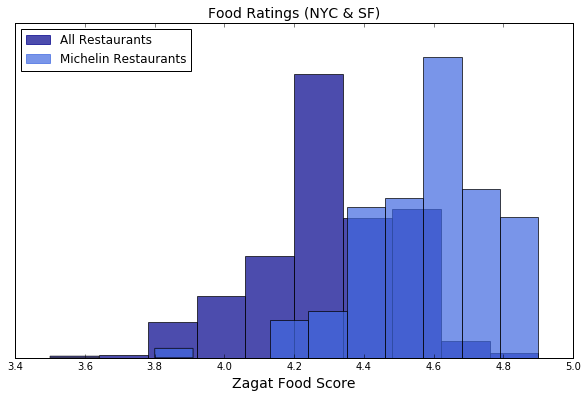

In [888]:
#Food is skewed left - we're hitting the boundary at 5

# Histogram for cost of star restaurants
fig, ax = plt.subplots(figsize=(10,6))


training[(training.food>0)].food.hist(normed=True, alpha=.7, color='darkblue')
training[(training.food>0) & (training.stars>0)].food.hist(normed=True, alpha=.7, color='royalblue')
ax.set_title('Food Ratings (NYC & SF)', fontsize=14)
ax.set_ylabel('', fontsize=14)
ax.set_xlabel('Zagat Food Score', fontsize=14)
ax.grid(False)
#ax.set_xlim([0,400])

allr = mpatches.Patch(color='darkblue', alpha=.7, label='All Restaurants')
mich = mpatches.Patch(color='royalblue', alpha=.7, label='Michelin Restaurants')
plt.legend(handles=[allr, mich], loc='upper left')

cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_ticks([])




plt.savefig('../foodratings.png')



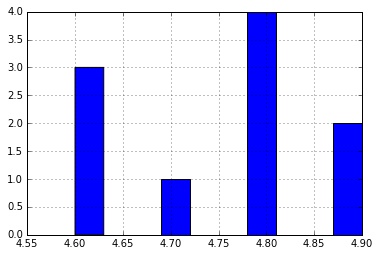

In [192]:
#Here's my 10 3-star restaurants 
training[(training.food>3) & (training.stars>2)].food.hist()

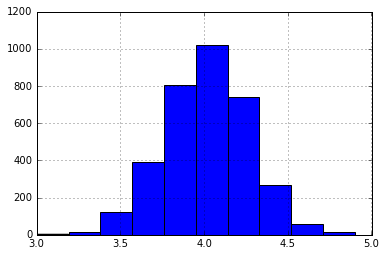

In [176]:
#Service really does look normally distributed
training[training.service>0].service.hist()

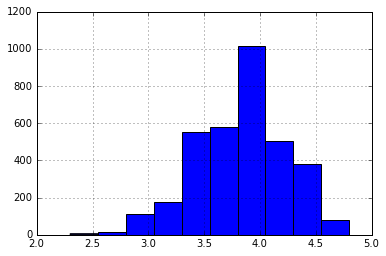

In [177]:
#Decor
training[training.decor>0].decor.hist()

In [199]:
training.head()

,addr_city,cost,cuisine,latitude,longitude,neighborhood,open_table,price_level,title,url,food,decor,service,address,stars
0,New York,176,French,40.7667732,-73.9676056,East 60s,,VE,daniel,https://www.zagat.com/r/daniel-new-york,4.9,4.8,4.9,"60 E. 65th St., New York 10065",2.0
1,New York,141,French,40.7169685,-74.0089569,TriBeCa,http://www.opentable.com/restaurant/profile/29...,VE,bouley,https://www.zagat.com/r/bouley-restaurant-new-...,4.9,4.8,4.8,"163 Duane St., New York 10013",1.0
2,New York,182,Seafood,40.7616959,-73.9818802,West 50s,http://www.opentable.com/restaurant/profile/25...,VE,le bernardin,https://www.zagat.com/r/le-bernardin-new-york,4.9,4.8,4.9,"155 W. 51st St., New York 10019",3.0
3,New York,341,New American,40.7682533,-73.9829407,West 50s,http://www.opentable.com/restaurant/profile/27...,VE,per se,https://www.zagat.com/r/per-se-new-york,4.8,4.7,4.8,"10 Columbus Circle, New York 10019",3.0
4,New York,58,Asian,40.7290497,-73.9856186,East Village,,E,graffiti,https://www.zagat.com/r/graffiti-new-york,4.8,4.3,4.7,NaN,NaN


Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)


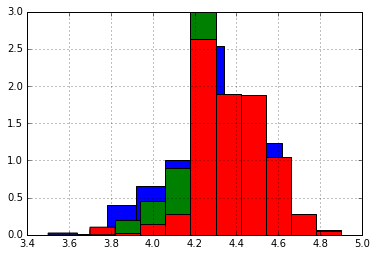

In [211]:
# Double checking distributions across datasets
datasets = [nyc_zm, sf_zm, chicago_zm]
for i in datasets:
    print i[i.food>0].food.hist(normed=True)

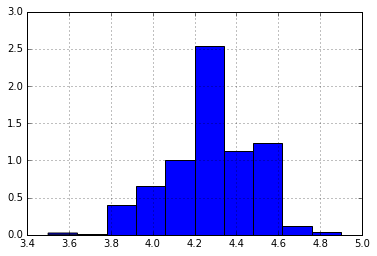

In [212]:
nyc_zm[nyc_zm.food>0].food.hist(normed=True)

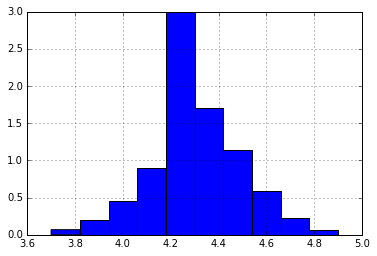

In [213]:
sf_zm[sf_zm.food>0].food.hist(normed=True)

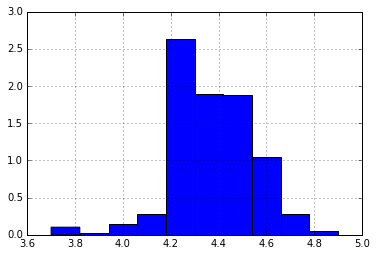

In [214]:
chicago_zm[chicago_zm.food>0].food.hist(normed=True)

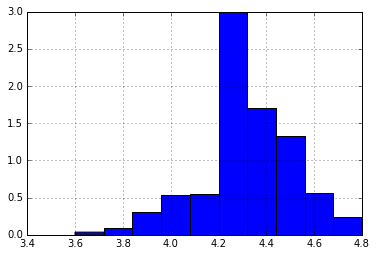

In [215]:
dc[dc.food>0].food.hist(normed=True)

In [236]:
# The averages vary a lot... DC does seem to have lower average ratings
datasets = [nyc_zm, sf_zm, chicago_zm]
for i in datasets:
        print i['food'].mean(), i['food'].median(), i['food'].std(), i[i.stars>0]['stars'].count(), i.title.count()

3.22949042284 4.2 1.83827444135 75 2771
2.84483440435 4.2 2.05325289186 49 2029
2.85610465116 4.3 2.10221852007 21 1376


In [240]:
print 'nyc', 75/2771.00
print 'sf', 49/2029.00
print 'chicago', 21/1376.00

nyc 0.0270660411404
sf 0.0241498275012
chicago 0.015261627907


In [243]:
# I'm testing to see if these have the same distribution... clearly not
import scipy.stats as stats
stats.ttest_ind(nyc_zm[nyc_zm.food>0].food, sf_zm[sf_zm.food>0].food)

Ttest_indResult(statistic=-7.3478518823568848, pvalue=2.5054509848989236e-13)

In [244]:
stats.ttest_ind(nyc_zm[nyc_zm.food>0].food, chicago[chicago.food>0].food)

Ttest_indResult(statistic=-16.653879143861339, pvalue=1.2769978780525387e-59)

In [247]:
import matplotlib.pyplot as plt

[None, None, None, None, None, None, None, None, None, None]

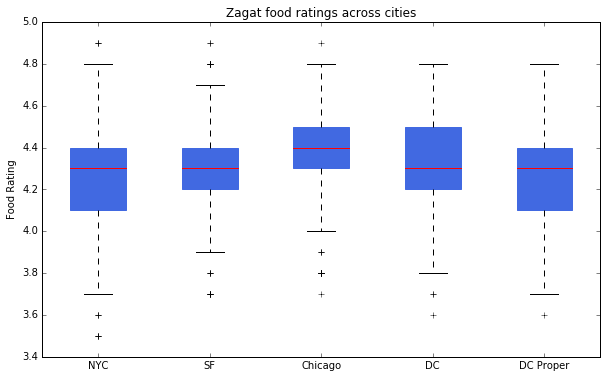

In [706]:
#make boxplot (referenced: http://matplotlib.org/examples/pylab_examples/boxplot_demo2.html)

nycfood = nyc_zm[nyc_zm.food>0].food.as_matrix()
sffood = sf_zm[sf_zm.food>0].food.as_matrix()
chicagofood = chicago_zm[chicago_zm.food>0].food.as_matrix()
dcfood = dc[dc.food>0].food.as_matrix()
dcpropfood = dc_prop[dc_prop.food>0].food.as_matrix()


fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title('Zagat food ratings across cities')
ax1.set_ylabel('Food Rating')
bp = plt.boxplot([nycfood,sffood,chicagofood,dcfood, dcpropfood], patch_artist=True)
xtickNames = plt.setp(ax1, xticklabels=['NYC','SF', 'Chicago','DC','DC Proper'])
plt.setp(xtickNames, rotation=0, fontsize=10)
plt.setp(bp['boxes'], color='royalblue')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='orange', marker='+')

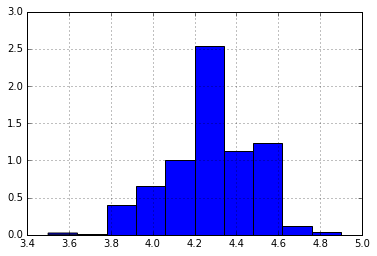

In [712]:
nyc_zm[nyc_zm.food>0].food.hist(normed=True)

Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)


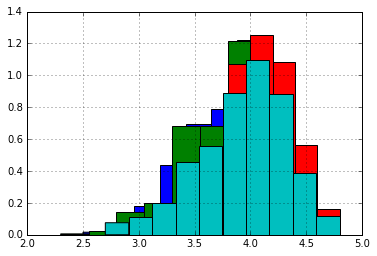

In [789]:
li = [sf_zm, nyc_zm, chicago_zm, dc]
for i in li:
    print i[i.decor>0].decor.hist(normed=True)

Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)


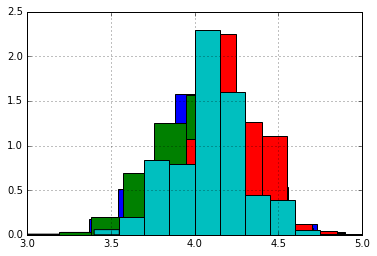

In [790]:
li = [sf_zm, nyc_zm, chicago_zm, dc]
for i in li:
    print i[i.service>0].service.hist(normed=True)

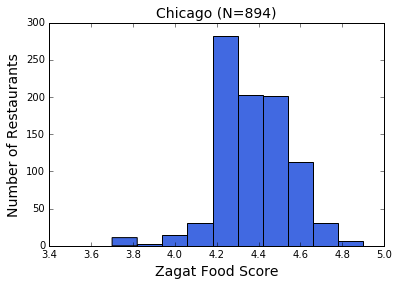

In [791]:
fig = plt.figure()
ax = fig.add_subplot(111)
chicago_zm[chicago_zm.food>0].food.hist(color='royalblue')
ax.set_title('Chicago (N=%d)' %chicago_zm[chicago_zm.food>0].food.count(), fontsize=14)
ax.set_ylabel('Number of Restaurants', fontsize=14)
ax.set_xlabel('Zagat Food Score', fontsize=14)
ax.grid(False)
ax.set_xlim([3.4, 5])
plt.savefig('../chicago_food.png')

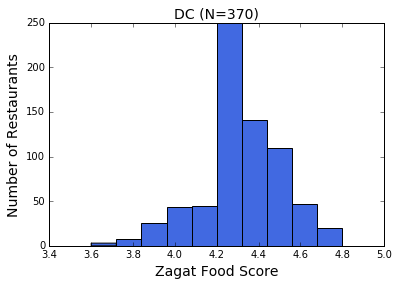

In [792]:
fig = plt.figure()
ax = fig.add_subplot(111)
dc[dc.food>0].food.hist(color='royalblue')
ax.set_title('DC (N=%d)' %dc_prop[dc_prop.food>0].food.count(), fontsize=14)
ax.set_ylabel('Number of Restaurants', fontsize=14)
ax.set_xlabel('Zagat Food Score', fontsize=14)
ax.grid(False)
ax.set_xlim([3.4, 5])
plt.savefig('../dc_food.png')

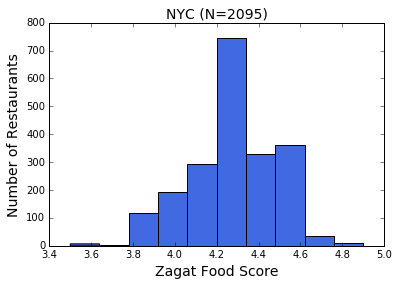

In [793]:
fig = plt.figure()
ax = fig.add_subplot(111)
nyc_zm[nyc_zm.food>0].food.hist(color='royalblue')
ax.set_title('NYC (N=%d)' %nyc_zm[nyc_zm.food>0].food.count(), fontsize=14)
ax.set_ylabel('Number of Restaurants', fontsize=14)
ax.set_xlabel('Zagat Food Score', fontsize=14)
ax.grid(False)
ax.set_xlim([3.4, 5])
plt.savefig('../nyc_food.png')

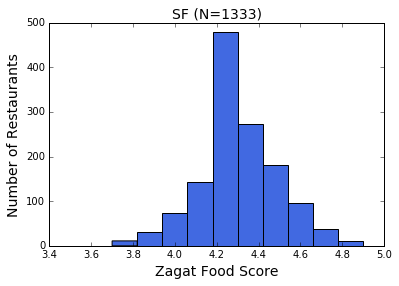

In [794]:
fig = plt.figure()
ax = fig.add_subplot(111)
sf_zm[sf_zm.food>0].food.hist(color='royalblue')
ax.set_title('SF (N=%d)' %sf_zm[sf_zm.food>0].food.count(), fontsize=14)
ax.set_ylabel('Number of Restaurants', fontsize=14)
ax.set_xlabel('Zagat Food Score', fontsize=14)
ax.grid(False)
ax.set_xlim([3.4, 5])
plt.savefig('../sf_food.png')

In [755]:
#confirming everything I have zagat ratings for I also have cost for
li = [nyc_zm, sf_zm, chicago_zm, dc, dc_prop]
for i in li:
    print i[(i['food']>0)&(i['cost']>0)].cost.count()
    print i[(i['food']>0)].cost.count()

2079
2079
1328
1328
882
882
670
670
363
363


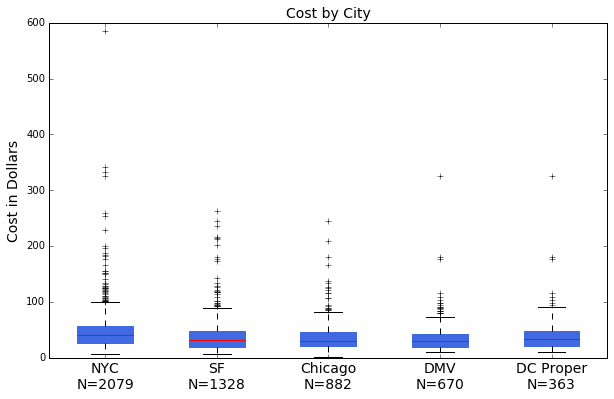

In [886]:
#Let's try costs...I'm filtering for zagat ratings

nycfood = nyc_zm[nyc_zm.food>0].cost.as_matrix()
sffood = sf_zm[sf_zm.food>0].cost.as_matrix()
chicagofood = chicago_zm[chicago_zm.food>0].cost.as_matrix()
dcfood = dc[dc.food>0].cost.as_matrix()
dcpropfood = dc_prop[dc_prop.food>0].cost.as_matrix()


fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title('Cost by City', fontsize=14)
ax1.set_ylabel('Cost in Dollars', fontsize=14)
bp = plt.boxplot([nycfood,sffood,chicagofood,dcfood, dcpropfood], patch_artist=True)
xtickNames = plt.setp(ax1, xticklabels=['NYC\nN=%d' %nyc_zm[nyc_zm.food>0].cost.count(),\
                                        'SF\nN=%d' %sf_zm[sf_zm.food>0].cost.count(), \
                                        'Chicago\nN=%d' %chicago_zm[chicago_zm.food>0].cost.count(), \
                                        'DMV\nN=%d'%dc[dc.food>0].cost.count() ,\
                                        'DC Proper\nN=%d' % dc_prop[dc_prop.food>0].cost.count()]) 
plt.setp(xtickNames, rotation=0, fontsize=14)
plt.setp(bp['boxes'], color='royalblue')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='orange', marker='+')

plt.savefig('../cost_outliers.png')

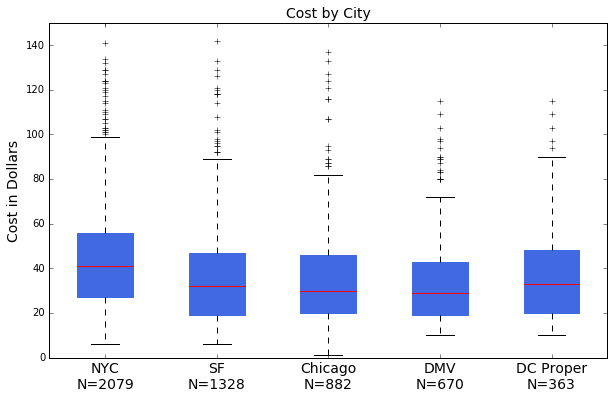

In [887]:
#Adjusting y-axis

nycfood = nyc_zm[nyc_zm.food>0].cost.as_matrix()
sffood = sf_zm[sf_zm.food>0].cost.as_matrix()
chicagofood = chicago_zm[chicago_zm.food>0].cost.as_matrix()
dcfood = dc[dc.food>0].cost.as_matrix()
dcpropfood = dc_prop[dc_prop.food>0].cost.as_matrix()


fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title('Cost by City', fontsize=14)
ax1.set_ylabel('Cost in Dollars', fontsize=14)
ax1.set_ylim([0, 150])
bp = plt.boxplot([nycfood,sffood,chicagofood,dcfood, dcpropfood], patch_artist=True)
xtickNames = plt.setp(ax1, xticklabels=['NYC\nN=%d' %nyc_zm[nyc_zm.food>0].cost.count(),\
                                        'SF\nN=%d' %sf_zm[sf_zm.food>0].cost.count(), \
                                        'Chicago\nN=%d' %chicago_zm[chicago_zm.food>0].cost.count(), \
                                        'DMV\nN=%d'%dc[dc.food>0].cost.count() ,\
                                        'DC Proper\nN=%d' % dc_prop[dc_prop.food>0].cost.count()]) 
plt.setp(xtickNames, rotation=0, fontsize=14)
plt.setp(bp['boxes'], color='royalblue')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='orange', marker='+')
plt.savefig('../cost_nooutliers.png')

In [762]:
#Checking how many MIhcelin restaurants aren't Zagat rated - but remember, some of these are closed
li = [nyc_zm, sf_zm, chicago_zm]
for i in li:
    print i[(i['food']>0)&(i['stars']>0)].stars.count()
    print i[(i['stars']>0)].stars.count()

66
75
42
49
20
21


[None, None, None, None, None, None, None, None, None, None]

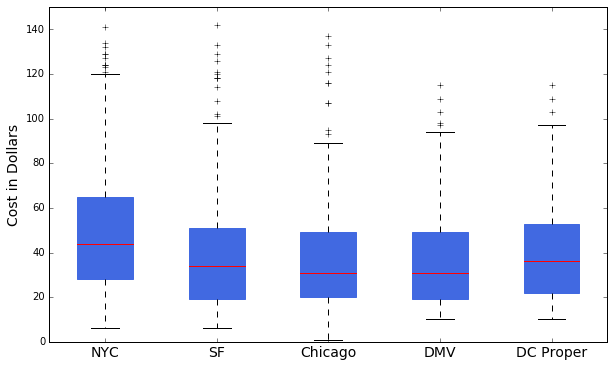

In [751]:
#Food over 4.2 - ha, these look about the same

nycfood = nyc_zm[nyc_zm.food>4.2].cost.as_matrix()
sffood = sf_zm[sf_zm.food>4.2].cost.as_matrix()
chicagofood = chicago_zm[chicago_zm.food>4.2].cost.as_matrix()
dcfood = dc[dc.food>4.2].cost.as_matrix()
dcpropfood = dc_prop[dc_prop.food>4.2].cost.as_matrix()


fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title('', fontsize=14)
ax1.set_ylabel('Cost in Dollars', fontsize=14)
ax1.set_ylim([0, 150])
bp = plt.boxplot([nycfood,sffood,chicagofood,dcfood, dcpropfood], patch_artist=True)
xtickNames = plt.setp(ax1, xticklabels=['NYC','SF', 'Chicago','DMV','DC Proper'])
plt.setp(xtickNames, rotation=0, fontsize=14)
plt.setp(bp['boxes'], color='royalblue')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='orange', marker='+')

[None, None, None, None, None, None]

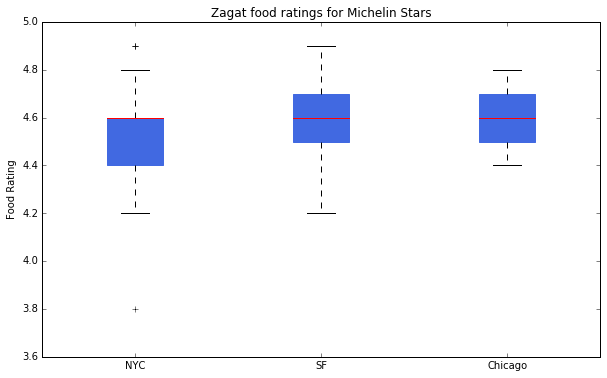

In [473]:
# Maybe what matters is the distribution among restaurants with stars...

nycfood = nyc_zm[(nyc_zm.food>0) & (nyc_zm.stars>0)].food.as_matrix()
sffood = sf_zm[(sf_zm.food>0) & (sf_zm.stars>0)].food.as_matrix()
chicagofood = chicago_zm[(chicago_zm.food>0) & (chicago_zm.stars>0)].food.as_matrix()


fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title('Zagat food ratings for Michelin Stars')
ax1.set_ylabel('Food Rating')
bp = plt.boxplot([nycfood,sffood,chicagofood], patch_artist=True)
xtickNames = plt.setp(ax1, xticklabels=['NYC','SF', 'Chicago'])
plt.setp(xtickNames, rotation=0, fontsize=10)
plt.setp(bp['boxes'], color='royalblue')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='orange', marker='+')